
# Phân loại Naive Bayes với Scikit-Learn


In [1]:

import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 



## Bộ dữ liệu Iris

Trong bài này, chúng ta sẽ phân loại ba loại hoa Iris dựa trên chiều dài và chiều rộng của đài hoa (sepal) và cánh hoa (petal).
Ba loại này bao gồm **Setosa**, **Versicolor**, và **Virginica**, được mã hóa lần lượt thành 0, 1 và 2.

Bộ dữ liệu Iris có sẵn trong gói **scikit-learn**. Chúng ta có thể tải và sử dụng nó với đoạn mã sau:


In [2]:

# Tải bộ dữ liệu iris
iris = datasets.load_iris() 
class_names = iris.target_names 

# Chuyển sang định dạng pandas để dễ xử lý hơn
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names) 
iris_df['target'] = iris.target 


In [3]:

iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



Trước tiên, chúng ta chia ngẫu nhiên bộ dữ liệu thành **tập huấn luyện (80%)** và **tập kiểm tra (20%)**.


In [4]:

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']], 
    iris_df['target'], 
    test_size=0.2,  
    random_state=2021
)



## Mô hình và Kết quả

Trong thí nghiệm này, chúng ta xây dựng **Bộ phân loại Naive Bayes** để phân loại ba loại hoa Iris.
Giả định rằng chiều dài và chiều rộng của sepal và petal tuân theo **phân phối chuẩn (Gaussian)**. 
Do đó, ta huấn luyện mô hình **Gaussian Naive Bayes** như sau:


In [5]:

# Khởi tạo mô hình Naive Bayes (phân phối chuẩn)
NB = GaussianNB() 

# Huấn luyện mô hình
NB.fit(X_train, y_train) 
print("Độ chính xác trên tập huấn luyện: {:.2f}".format(NB.score(X_train, y_train))) 

# Đánh giá trên tập kiểm tra
y_predict = NB.predict(X_test) 
print("Độ chính xác trên tập kiểm tra: {:.2f}".format(NB.score(X_test, y_test))) 


Độ chính xác trên tập huấn luyện: 0.97
Độ chính xác trên tập kiểm tra: 0.93



Sau khi huấn luyện, mô hình đạt **độ chính xác 93%** trên tập kiểm tra.

## Trực quan hóa kết quả

Mô hình hoạt động tốt trong việc phân loại các loài hoa Iris. 
Để xác minh trực quan, chúng ta sử dụng **Phân tích thành phần chính (PCA)** để giảm dữ liệu xuống 2 chiều và trực quan hóa kết quả.


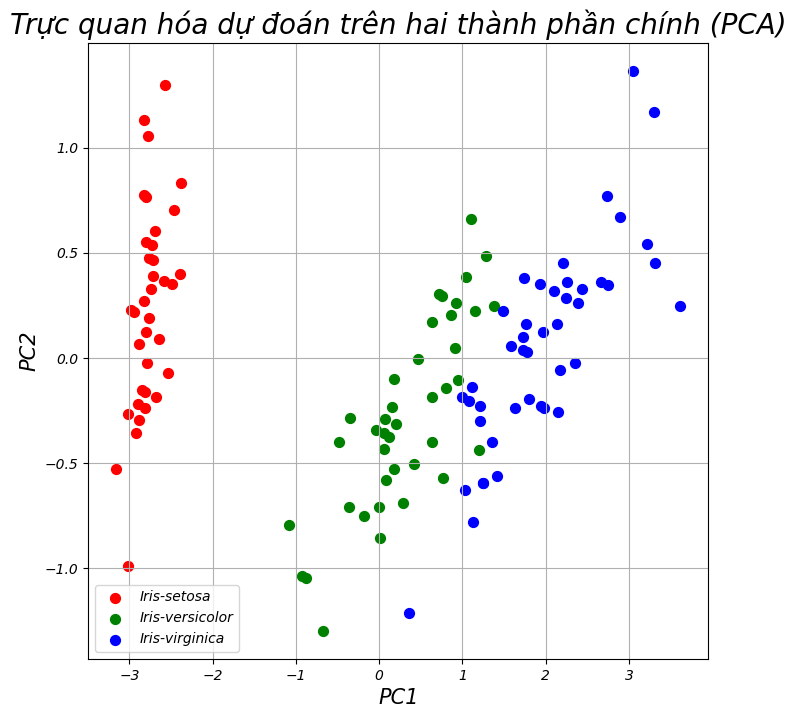

In [6]:

# Trực quan hóa bằng PCA
from sklearn.decomposition import PCA 

pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(X_train) 

principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2']) 
finalDf = pd.concat([principalDf, y_train.reset_index(drop=True)], axis=1) 

fig = plt.figure(figsize=(8, 8)) 
ax = fig.add_subplot(1, 1, 1) 
ax.set_xlabel('PC1', fontsize=15) 
ax.set_ylabel('PC2', fontsize=15) 
ax.set_title('Trực quan hóa dự đoán trên hai thành phần chính (PCA)', fontsize=20) 

targets = [0, 1, 2] 
targets_2_desc = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'} 
colors = ['r', 'g', 'b'] 

for target, color in zip(targets, colors): 
    indicesToKeep = finalDf['target'] == target 
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], 
               finalDf.loc[indicesToKeep, 'PC2'], 
               c=color, 
               s=50,  
               label=targets_2_desc[target]) 
ax.legend() 
ax.grid()



## Kết luận

Trong bài thực hành này, chúng ta đã sử dụng mô hình **Naive Bayes** để phân loại ba loại hoa Iris dựa trên chiều dài và chiều rộng của đài hoa và cánh hoa.  
Phương pháp này đạt **độ chính xác 93%** trên tập kiểm tra.
